# Testing the created framework

In [6]:
from utils import *
from pytorchNet import MLP, train_pytorch_model, generate_images, generate_contours
import framework as frw
import torch
import seaborn as sns
import glob
import cv2
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load dataset

In [7]:
train_set, train_target = generate_disc_set(2500)
test_set, test_target = generate_disc_set(2500)

## Create a model & test forward

In [8]:
model = create_model()
output = model.forward(train_set,no_grad=True)

## Test the backward and no_grad

### No_grad

In [9]:
criterion = frw.MSELoss()
output = model.forward(train_set,no_grad=True)
loss = criterion.forward(output,train_target)
grdwrtoutput = criterion.backward()

In [10]:
model.backward(grdwrtoutput)

'Tanh : Forward step has not been performed'

### backward with grad

In [11]:
output = model.forward(train_set,no_grad=False)
loss = criterion.forward(output,train_target)
grdwrtoutput = criterion.backward()

In [12]:
model.backward(grdwrtoutput)

### Check the shapes of the gradients 

In [13]:
for module in model.sequence:
    print(module)
    if module.params[module][0] is not None:
        print(module.params[module][0].shape)
        print(module.params[module][1].shape)

torch.Size([16, 3])
torch.Size([16, 3])
torch.Size([16, 17])
torch.Size([16, 17])
torch.Size([16, 17])
torch.Size([16, 17])
torch.Size([16, 17])
torch.Size([16, 17])
torch.Size([1, 17])
torch.Size([1, 17])


In [14]:
print(model.params)

{<framework.Linear object at 0x000001926039D518>: [tensor([[ 0.4211,  0.2110, -0.3723],
        [ 0.0799,  0.0794,  0.0139],
        [-0.4811, -0.2013,  0.3827],
        [-0.4789, -0.4891,  0.5613],
        [ 0.3406,  0.0255, -0.3547],
        [ 0.4936, -0.3830, -0.1840],
        [ 0.5444,  0.4726,  0.4593],
        [ 0.3033,  0.3652, -0.3192],
        [ 0.3278, -0.4523,  0.3699],
        [-0.4457, -0.4883,  0.5238],
        [ 0.4721,  0.3045, -0.5080],
        [-0.1698, -0.4593,  0.2508],
        [ 0.1597, -0.5065, -0.0983],
        [-0.1411, -0.5147, -0.0563],
        [ 0.3139,  0.0264,  0.0313],
        [ 0.4596, -0.2711, -0.1219]]), tensor([[-0.0464, -0.0318, -0.0523],
        [-0.0608, -0.0532, -0.0989],
        [-0.0024, -0.0025, -0.0097],
        [ 0.0113,  0.0229,  0.0629],
        [ 0.0022,  0.0019,  0.0022],
        [ 0.0586,  0.0196,  0.0684],
        [ 0.0548,  0.0597,  0.0843],
        [-0.0353, -0.0385, -0.0494],
        [ 0.0200, -0.0048,  0.0228],
        [-0.0028, -0.0

# Try to train a model 

In [15]:
model = create_model()
params_frw = model.params
model_torch = MLP()
count = 0
with torch.no_grad():
    for par in model_torch.parameters():
        if params_frw[model.sequence[count]][0] is None:
            count += 1
        key = model.sequence[count]
        if len(par.shape) > 1:
            par -= par - params_frw[key][0][:,:-1]
        else:
            par -= par - params_frw[key][0][:,-1]
            count += 1

In [16]:
train_model(model,train_set,train_target,epochs=50)
train_pytorch_model(model_torch,train_set,train_target,epochs=150)

In [17]:
accuracy_test = compute_nb_errors(model,test_set,test_target)
accuracy_train = compute_nb_errors(model,train_set,train_target)

In [18]:
print("accuracy on train set = ",round(accuracy_train,1))
print("accuracy on test set = ",round(accuracy_test,1))

accuracy on train set =  91.4
accuracy on test set =  90.8


# Visualization

In [43]:
X = torch.linspace(0,1,1000)
Y = torch.linspace(0,1,1000)
grid_x, grid_y = torch.meshgrid(X,Y)
grid_x_vector = grid_x.reshape(-1,1)
grid_y_vector = grid_y.reshape(-1,1)
inputs = torch.cat((grid_x_vector,grid_y_vector),dim=1)
predicted = model.forward(inputs,no_grad=True)
predicted = predicted.reshape(grid_x.shape[0],-1)
with torch.no_grad():
    predicted_torch = model_torch(inputs)
    predicted_torch = predicted_torch.reshape(grid_x.shape[0],-1)

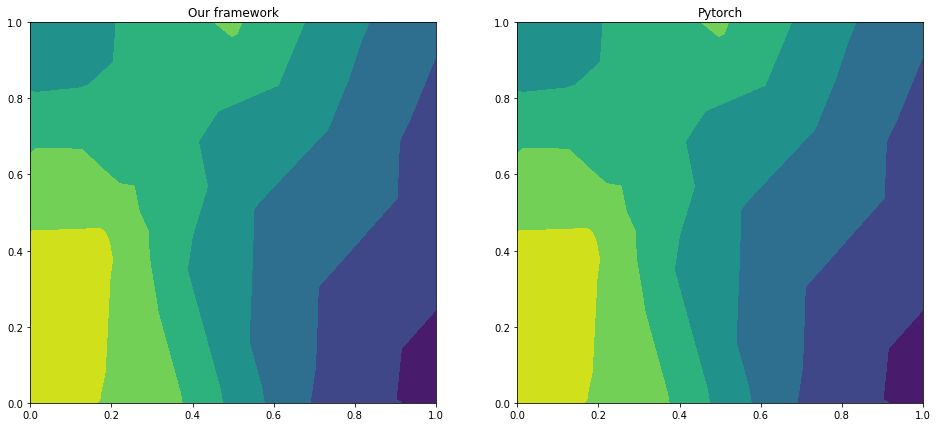

In [44]:
fig = plt.figure(figsize=[16,7])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
cs1 = ax1.contourf(grid_x,grid_y,predicted)
cs2 = ax2.contourf(grid_x,grid_y,predicted_torch)
ax1.set_title("Our framework")
ax2.set_title("Pytorch")
plt.show()

Run                 Accuracy Train           Accuracy Test            
---                 --------------           -------------            
0                   89.9000015258789         90.80000305175781        
1                   89.5                     90.5                     
['0.0', '1.0']


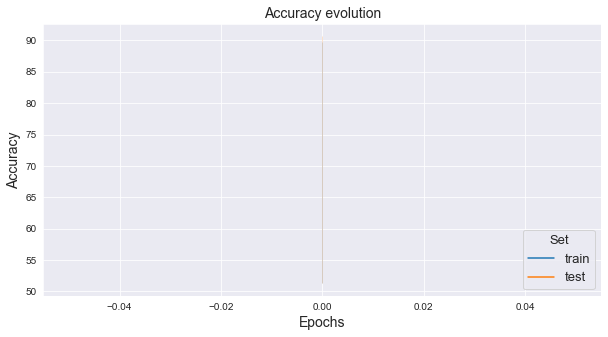

In [33]:
data = assess_model(create_model,1,1,2)

In [ ]:
columns = ["Run","Accuracy train","Accuracy test","Epochs"]
data_pd = pd.DataFrame(data,columns=columns)
fig = plt.figure(figsize=[10,6])
ax = fig.add_subplot(1,1,1)
sns.set_style("darkgrid")
sns.lineplot(data=data_pd,x="Epochs",y="Accuracy train",ax=ax)
sns.lineplot(data=data_pd,x="Epochs",y="Accuracy test",ax=ax)
plt.show()

# GIF

C:\Users\boulanger\Programming\Python\Deep_learning\Deep-learning-miniproject\Proj2\pytorchNet.py:91: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=[16,7])


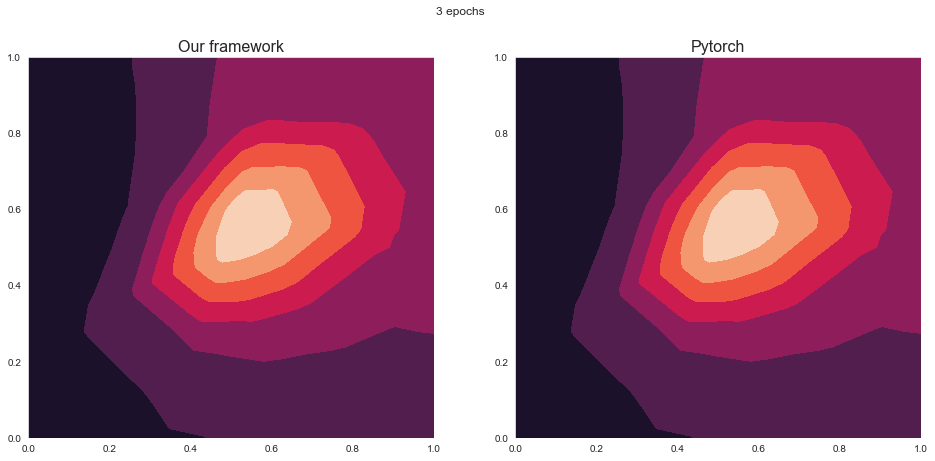

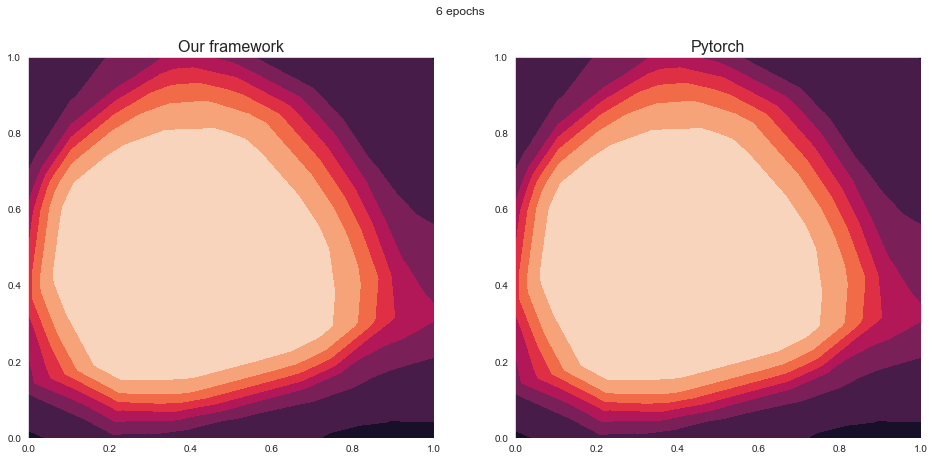

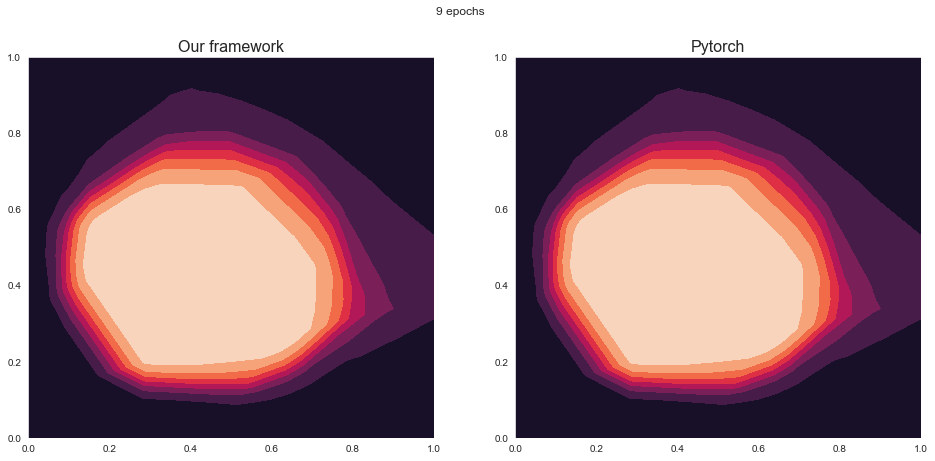

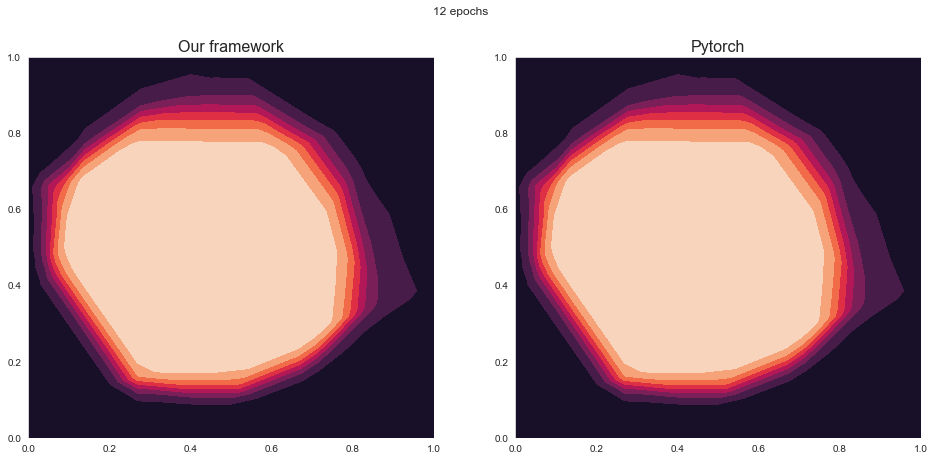

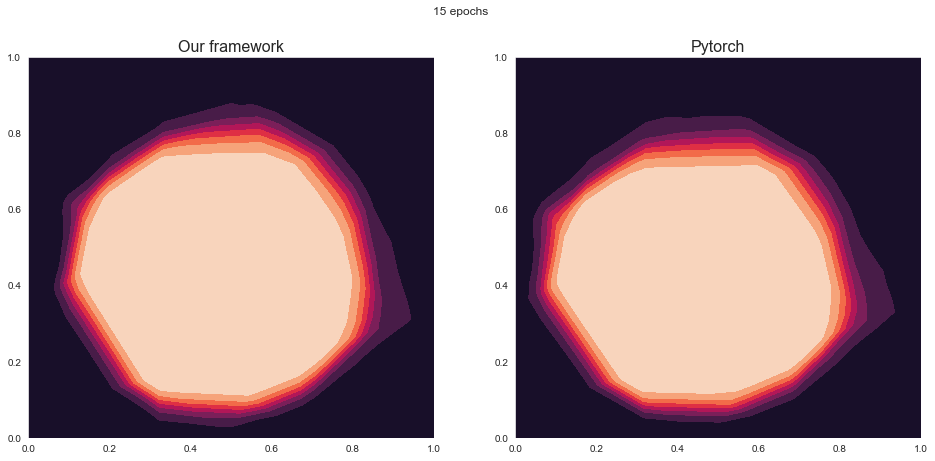

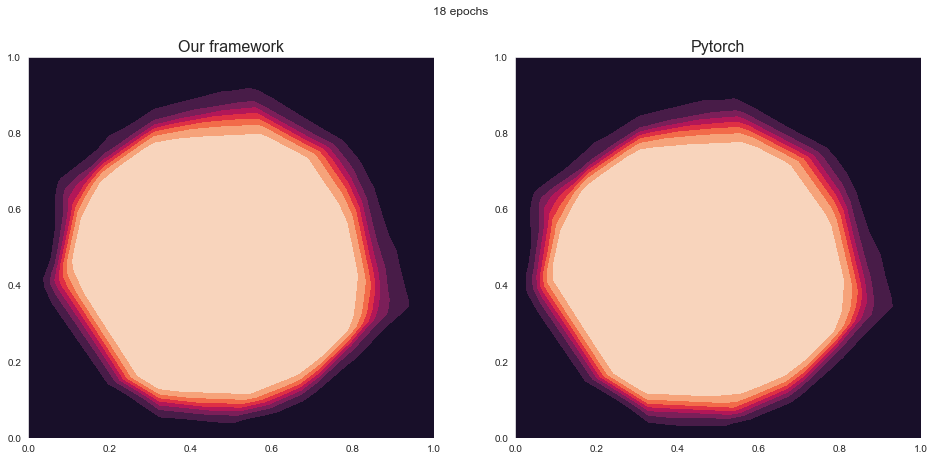

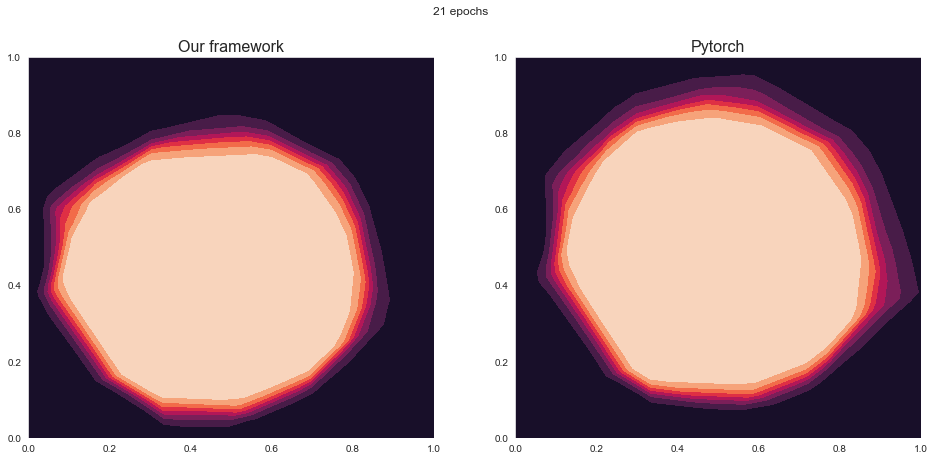

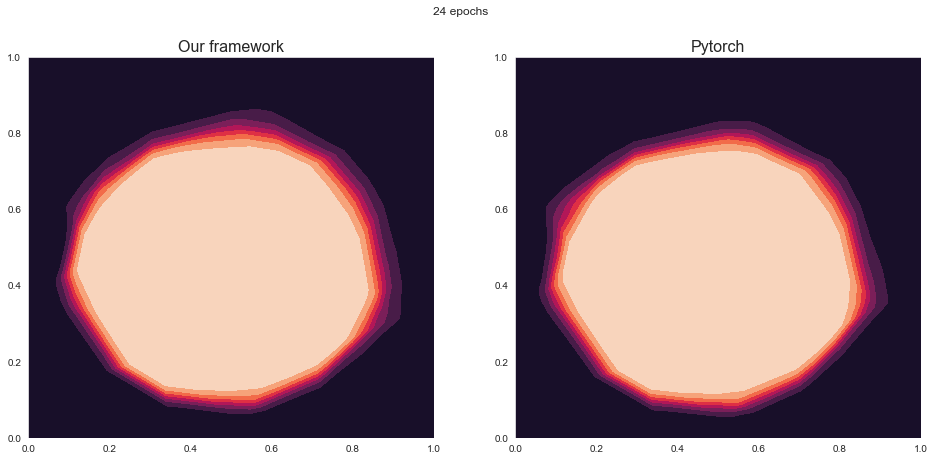

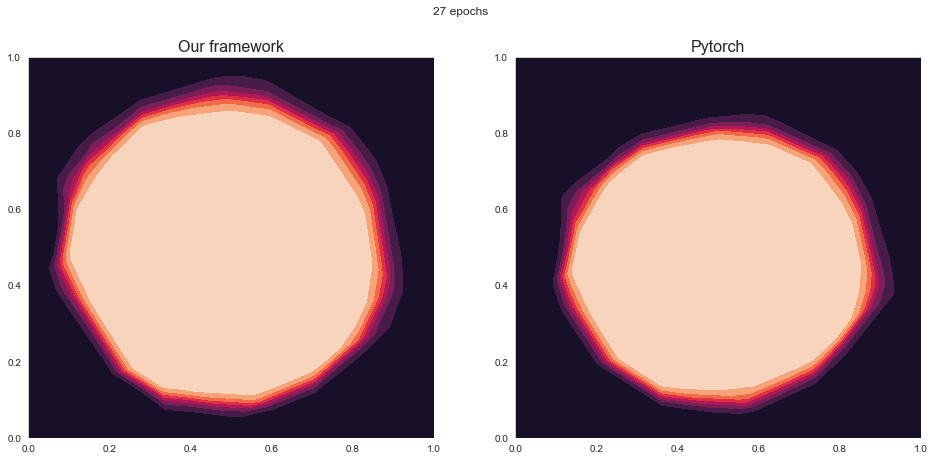

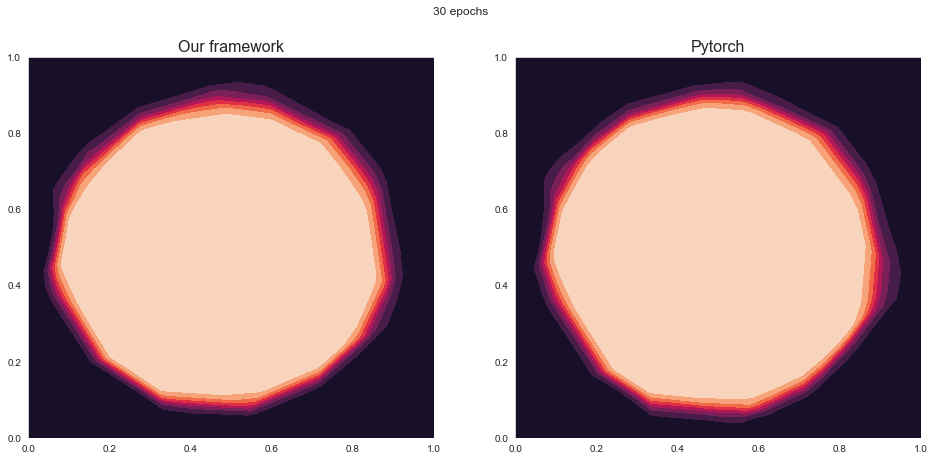

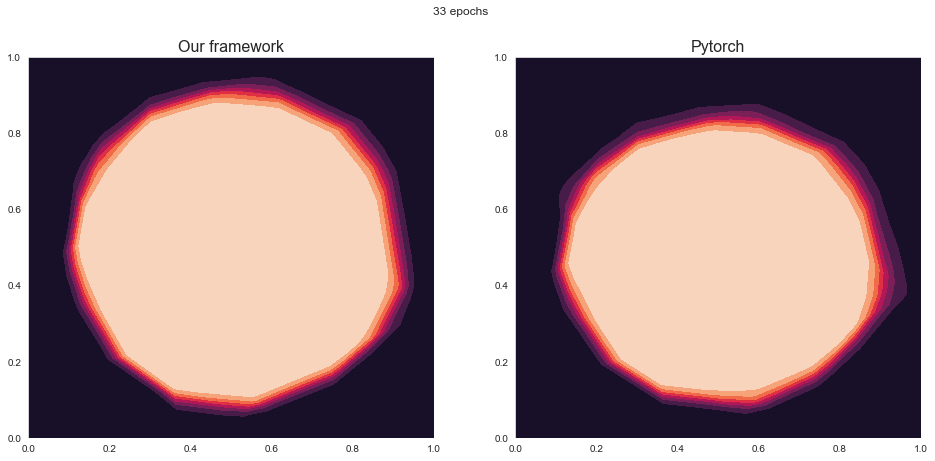

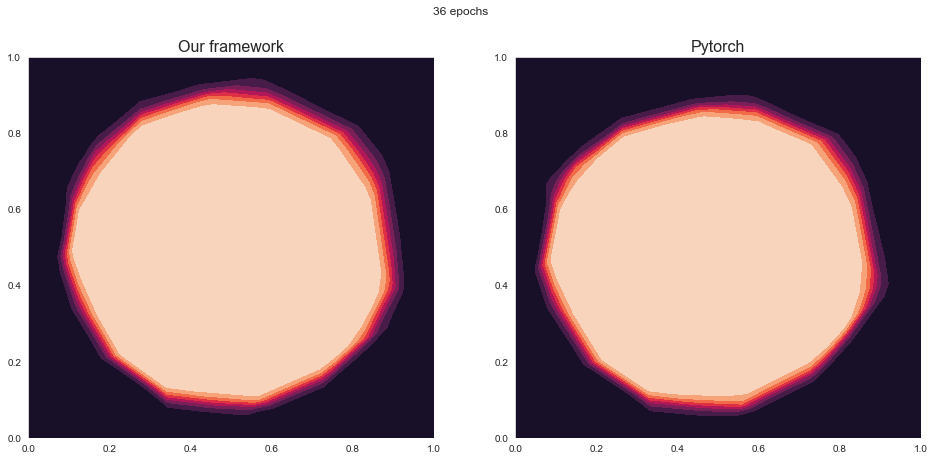

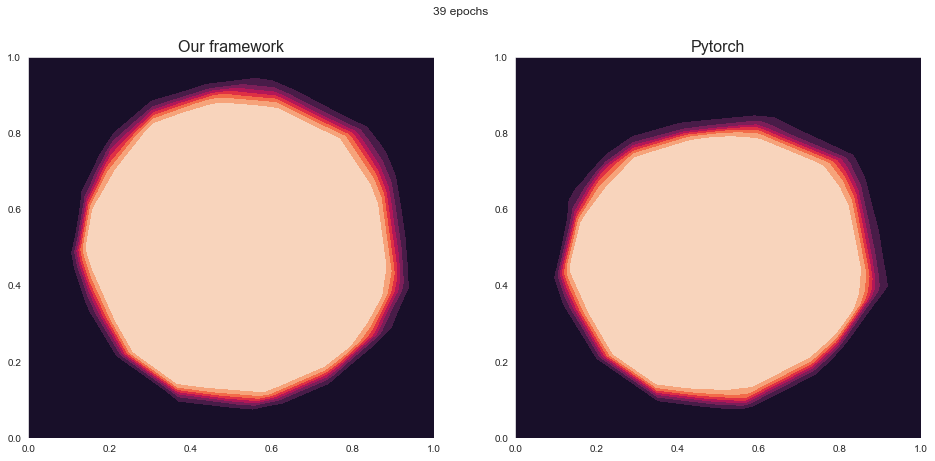

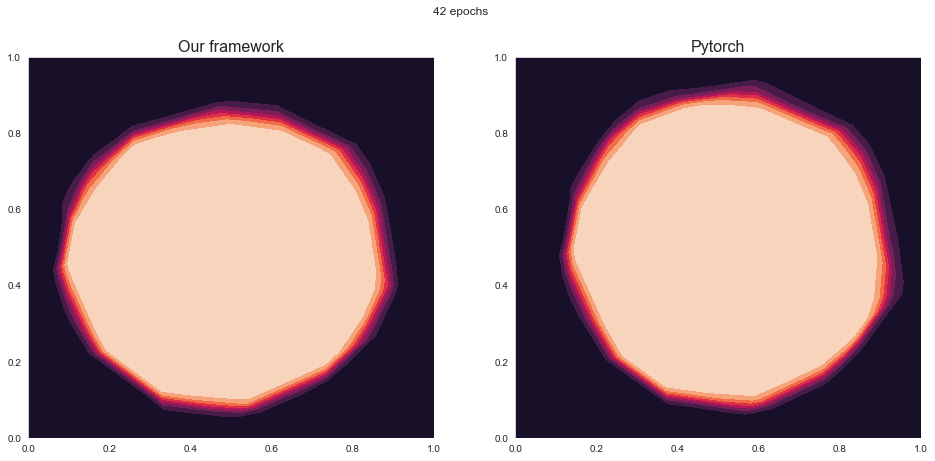

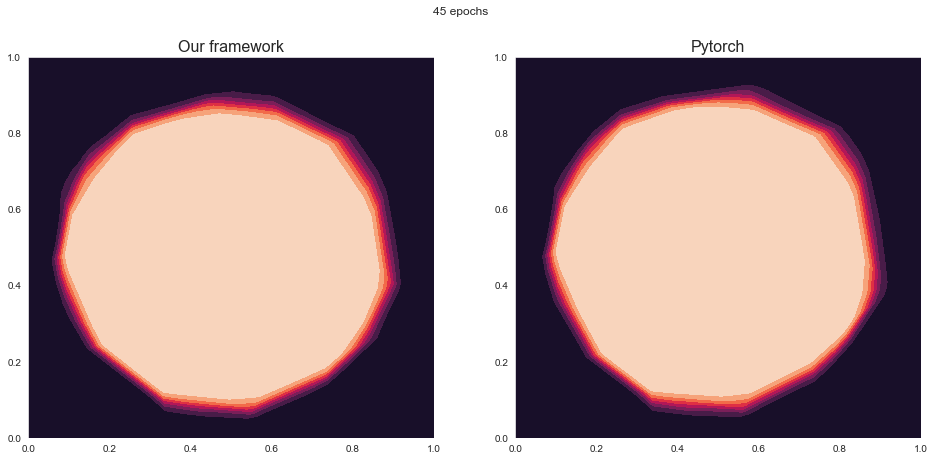

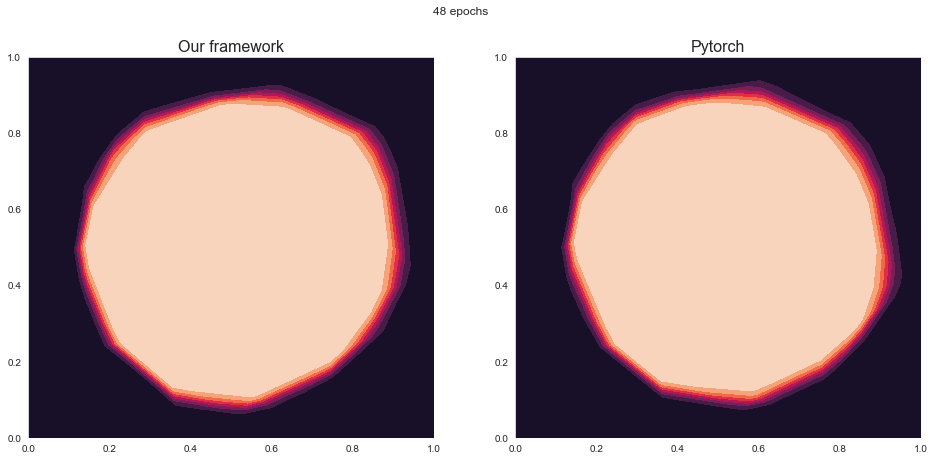

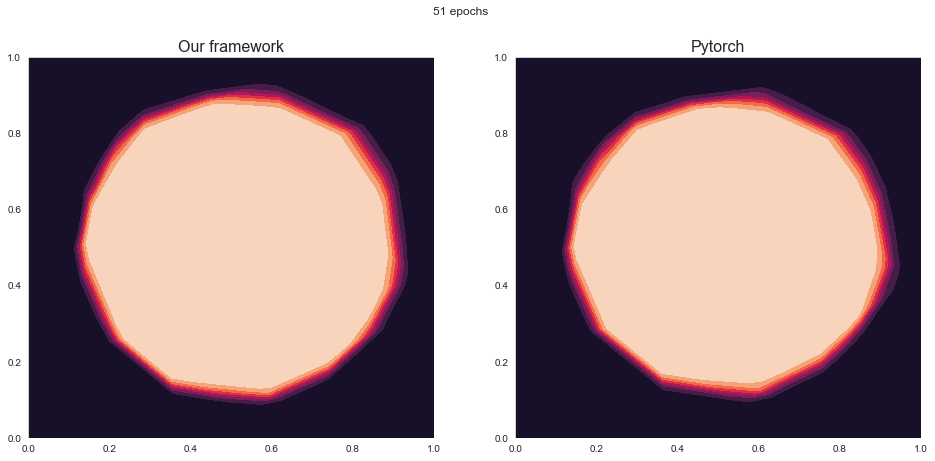

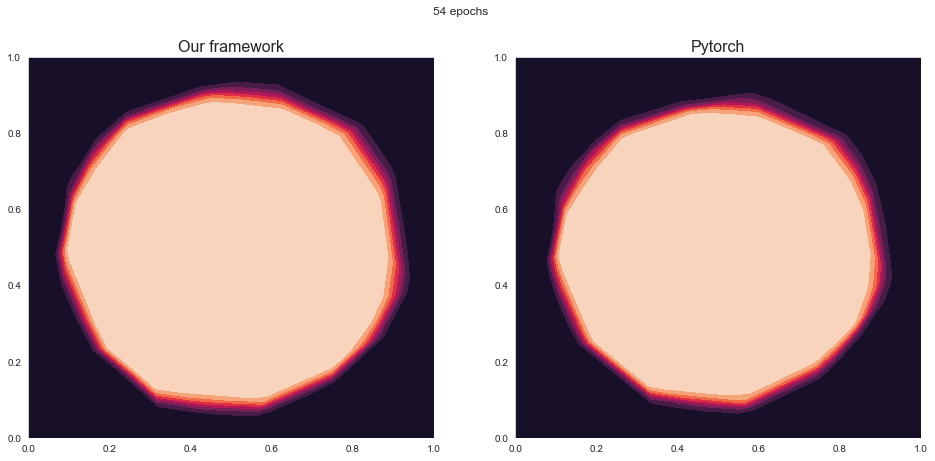

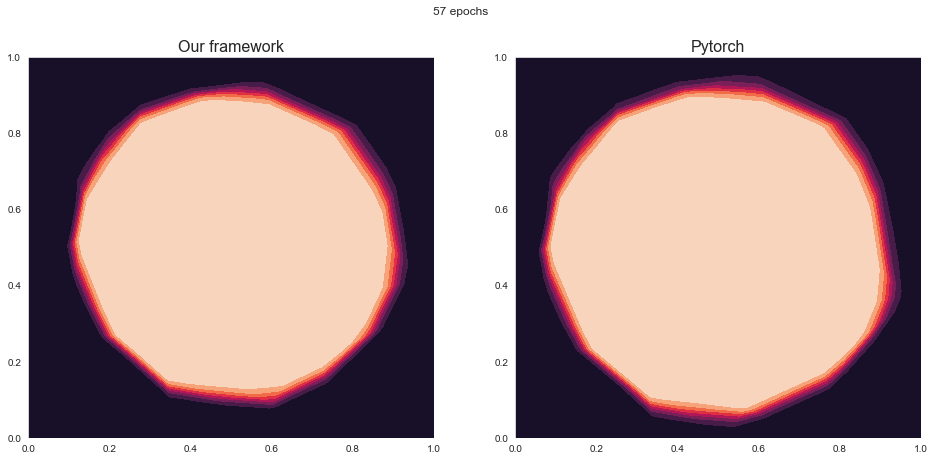

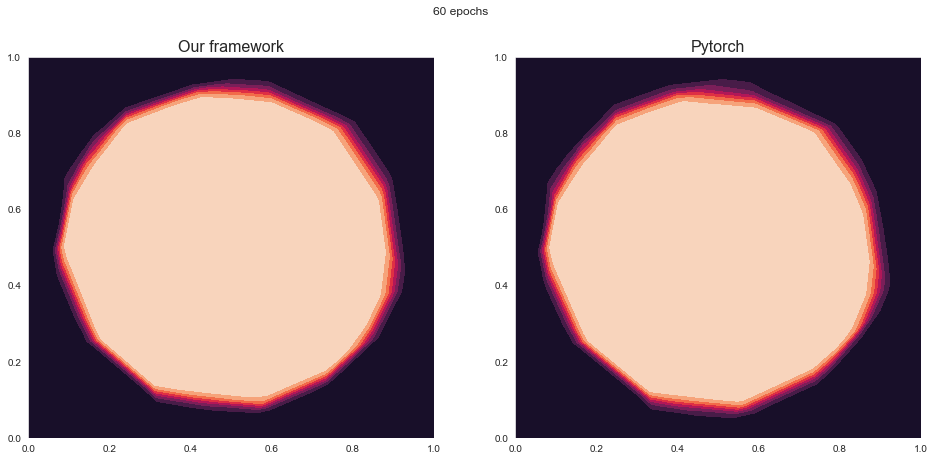

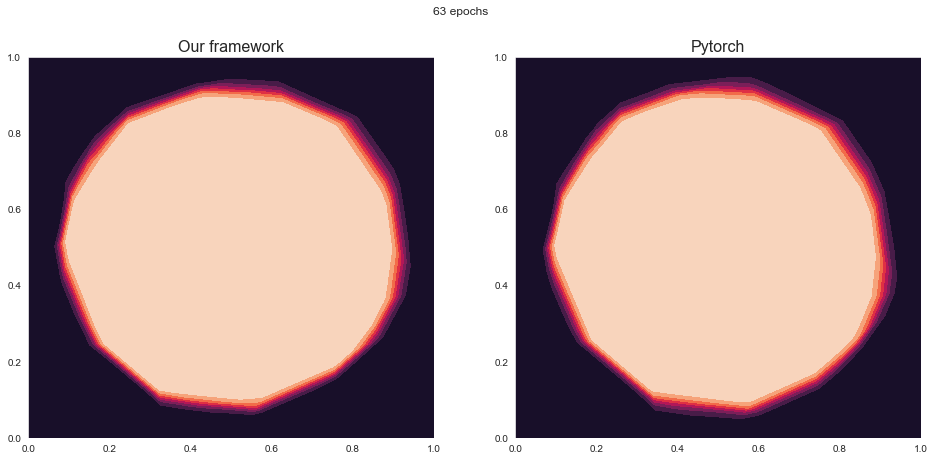

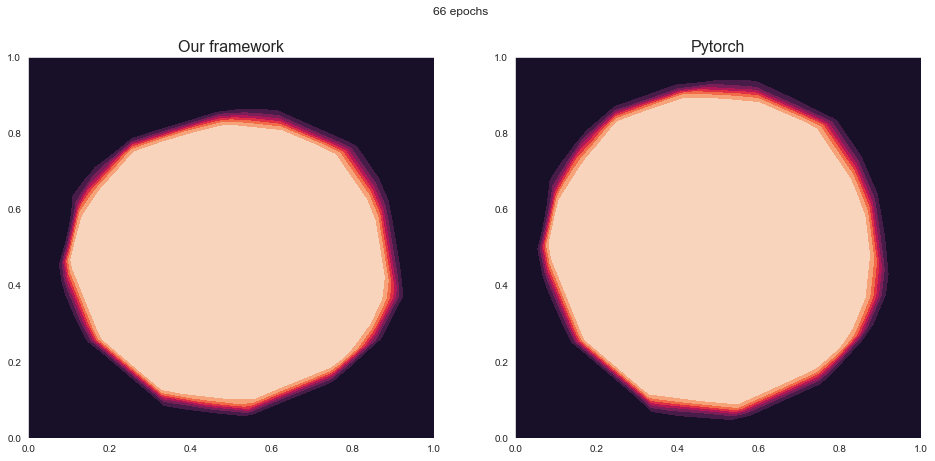

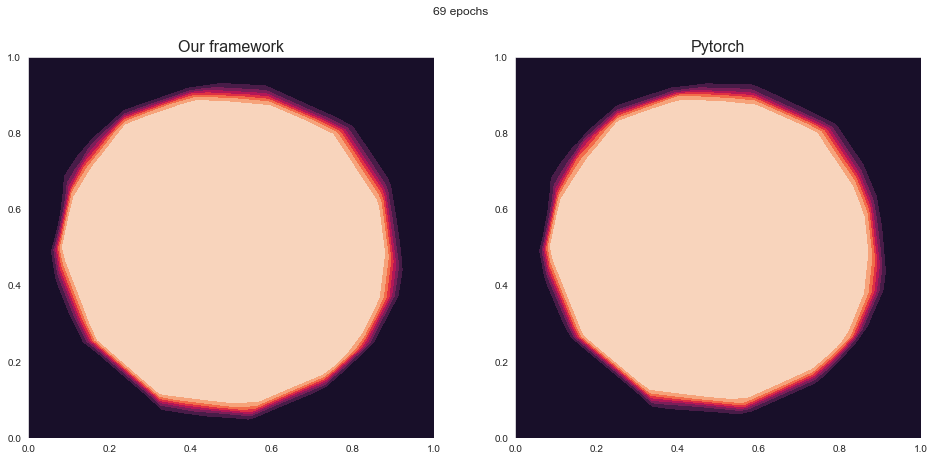

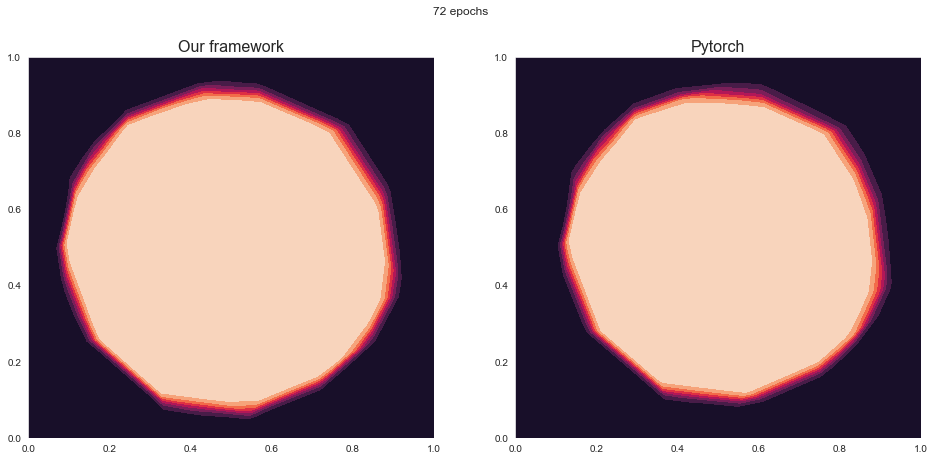

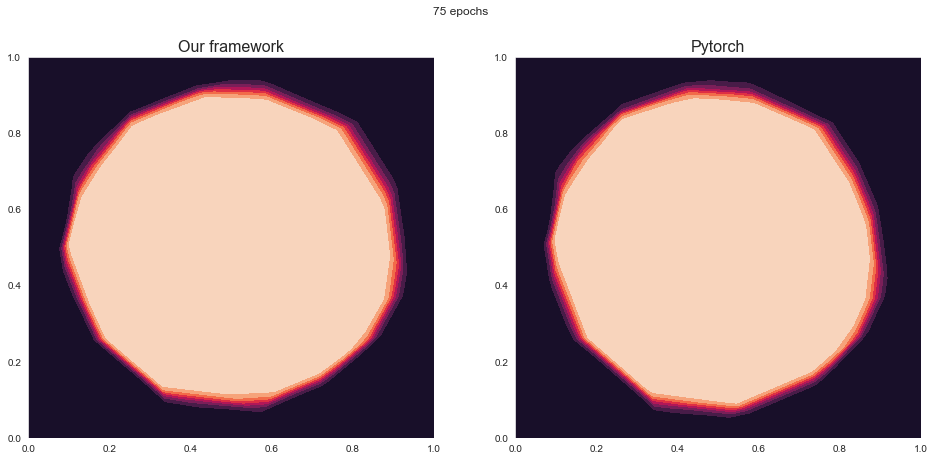

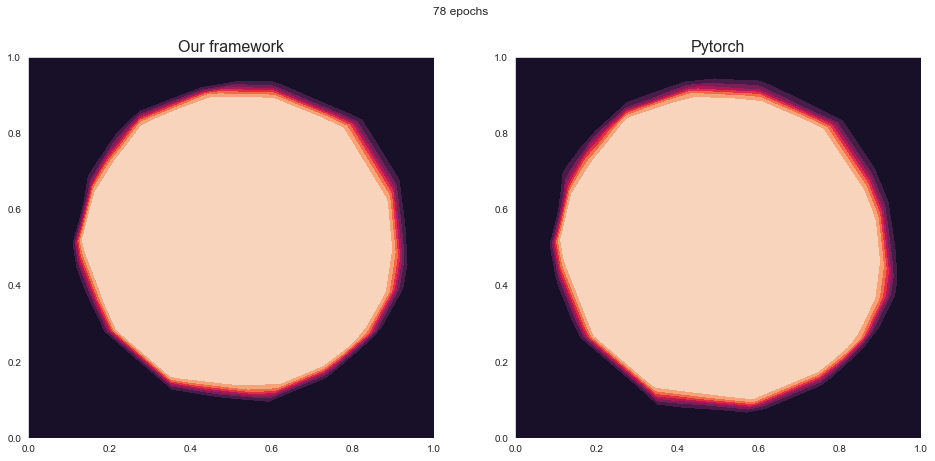

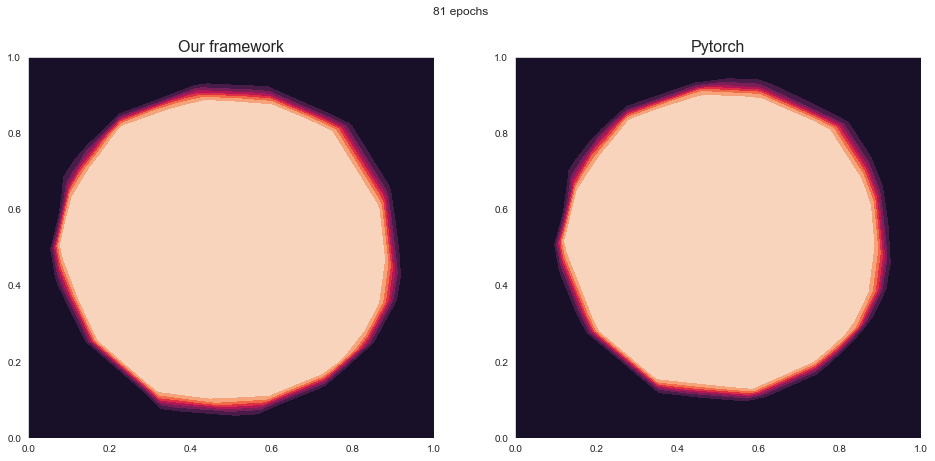

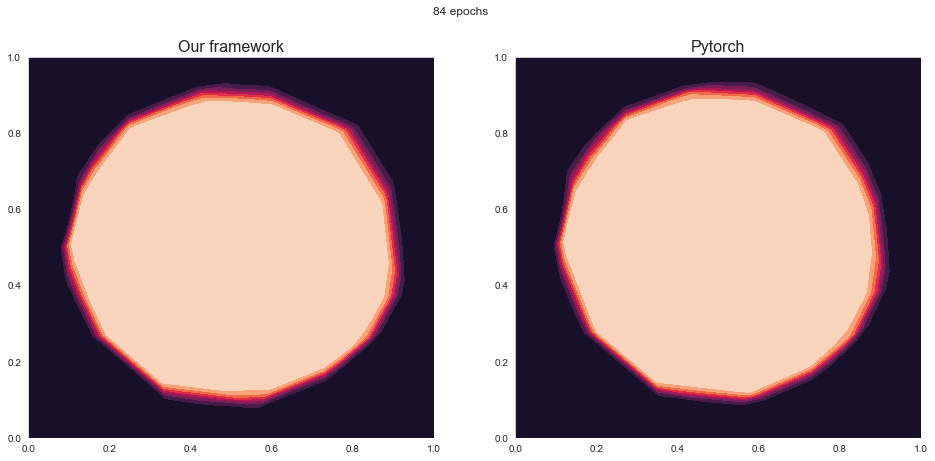

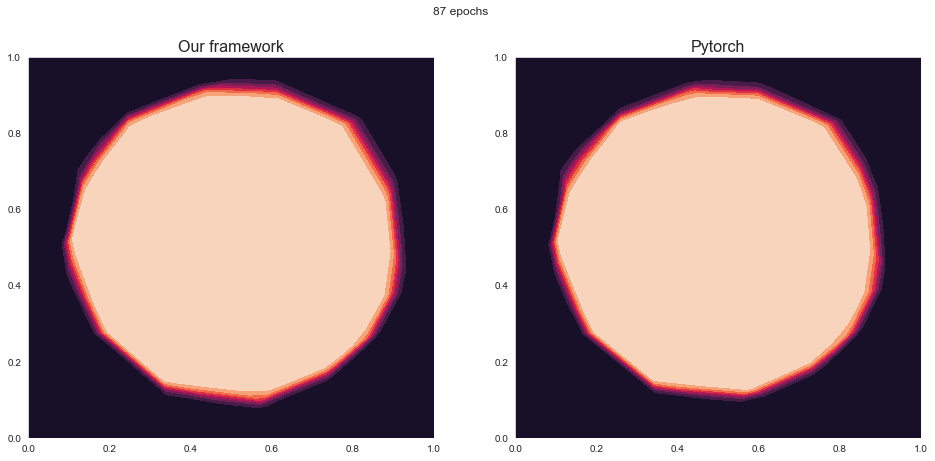

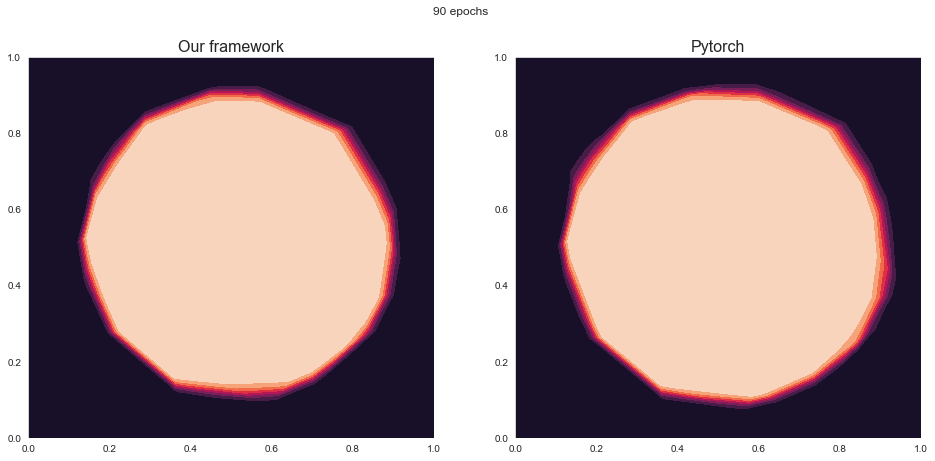

In [35]:
model = create_model()
model_torch = MLP()
steps=3
epochs=90
params_frw = model.params
count = 0
with torch.no_grad():
    for par in model_torch.parameters():
        if params_frw[model.sequence[count]][0] is None:
            count += 1
        key = model.sequence[count]
        if len(par.shape) > 1:
            par -= par - params_frw[key][0][:,:-1]
        else:
            par -= par - params_frw[key][0][:,-1]
            count += 1
generate_images(train_set,train_target,model,model_torch,steps,epochs,folder="figures")

In [36]:
path_img = ["figures/epochs" + str(nb_epochs) + ".jpg" for nb_epochs in range(steps,epochs+1,steps)]
img_arr = []
for filename in path_img:
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_arr.append(img)
 

out = cv2.VideoWriter('mygif.avi',cv2.VideoWriter_fourcc(*'DIVX'), 3, size)
 
for i in range(len(img_arr)):
    out.write(img_arr[i])
out.release()